In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%cd /content/drive/MyDrive/Colab_Notebooks/NIDA_CRM/HW1/

/content/drive/MyDrive/Colab_Notebooks/NIDA_CRM/HW1


In [10]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/font/K2D/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

In [11]:
cb= pd.read_excel('CB_data.xlsx', dtype={'คุณเกิดวันที่เท่าไหร่' : str})
print(cb.shape)
cb = cb[cb.columns[0:]]
cb.head()

(63, 63)


,คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 

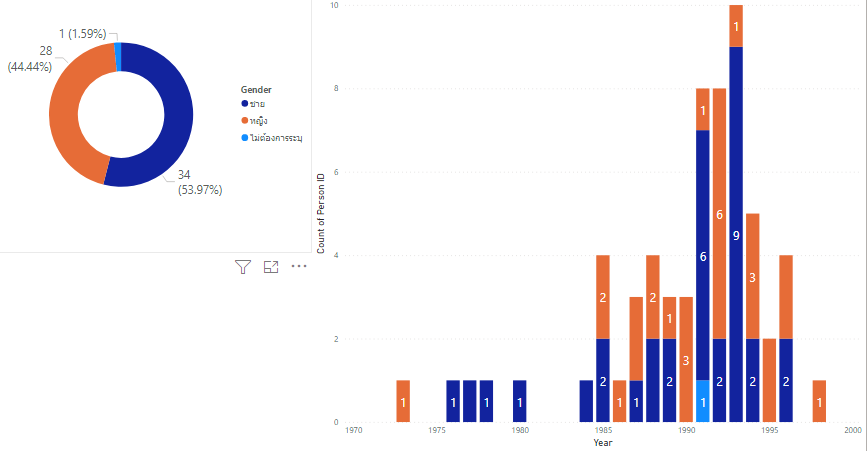

In [12]:
from datetime import datetime

df = cb.copy()

# rename columns
int_cols = [ c.replace('คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด','Interest') for c in df.columns[:30] ]
con_cols = [ c.replace('คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน','Consumption') for c in df.columns[30:60] ]
df.columns = int_cols + con_cols + ['interests', 'dob', 'gender']

# make answers categorical
intr_cattype = pd.CategoricalDtype(categories=['ไม่สนใจอย่างมากที่สุด', 'ไม่สนใจอย่างมาก', 'ไม่สนใจ', 
                                              'เฉยๆ', 'สนใจ', 'สนใจอย่างมาก', 'สนใจอย่างมากที่สุด'], ordered=True)
cons_cattype = pd.CategoricalDtype(categories=['แทบไม่ได้บริโภคเลย', 'หลายเดือนครั้ง', 'เดือนละครั้ง', 
                                               'เดือนละ 2-3 ครั้ง', 'อาทิตย์ละครั้ง', 'แทบทุกวัน'], ordered=True)

for col in df.columns[:30]:
    df[col] = df[col].astype(intr_cattype)

for col in df.columns[30:60]:
    df[col] = df[col].astype(cons_cattype)

# gender
df['gender'] = df['gender'].map({'หญิง':'F', 'ชาย':'M', 'ไม่ต้องการระบุ': np.nan})

# process dates
df['year'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[0]))
df['year'] = df['year'].apply(lambda x: x if x < 2500 else x - 543)
df['month'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[1]))
df['day'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[2]))

df['dob'] = pd.to_datetime(df[['year','month','day']])
df['age'] = df['year'].apply(lambda x: datetime.now().year - x if x < 2010 else np.nan)
df['age_group'] = pd.cut(df['age'], bins=[0,28,32,36,99], right=False, labels=['Below 28','28 - 31', '32 - 35','36+'])

df.drop(['year','month','day'], axis=1, inplace=True)
df.head()

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consumption [อาหารญี่ปุ่น],Consumption [อาหารจึน],Consumption [อาหารไทย],Consumption [อาหารอีสาน],Consumption [อาหารสุขภาพ],Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],Consumption [ปิ้งย่าง],Consumption [เหล้าเบียร์],Consumption [เสื้อผ้าแฟชั่น],Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],Consumption [การออกกำลังกาย],Consumption [การเล่นเกมส์],Consumption [การท่องเที่ยว],Consumption [การอ่านหนังสือ],Consumption [การอ่านบทความ Online],Consumption [การเรียน e-learning],Consumption [ดู Series],Consumption [ดูหนัง],Consumption [ดู Youtube],Consumption [ดู Netflix],Consumption [Content ด้านบันเทิง],Consumption [Content เกี่่ยวกับเกมส์],Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],interests,dob,gender,age,age_group
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19,M,33.0,32 - 35
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,กีฬา สัตว์เลี้ยง เทคโนโลยี,1993-08-10,F,28.0,28 - 31
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย

In [13]:
df.to_pickle('01_data_prep.pkl')

##EDA

In [14]:
intr_scale = ['ไม่สนใจอย่างมากที่สุด', 'ไม่สนใจอย่างมาก', 'ไม่สนใจ', 'เฉยๆ', 'สนใจ', 'สนใจอย่างมาก', 'สนใจอย่างมากที่สุด']
cons_scale = ['แทบไม่ได้บริโภคเลย', 'หลายเดือนครั้ง', 'เดือนละครั้ง', 'เดือนละ 2-3 ครั้ง', 'อาทิตย์ละครั้ง', 'แทบทุกวัน']

In [15]:
df = pd.read_pickle('01_data_prep.pkl')
df.head()

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consumption [อาหารญี่ปุ่น],Consumption [อาหารจึน],Consumption [อาหารไทย],Consumption [อาหารอีสาน],Consumption [อาหารสุขภาพ],Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],Consumption [ปิ้งย่าง],Consumption [เหล้าเบียร์],Consumption [เสื้อผ้าแฟชั่น],Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],Consumption [การออกกำลังกาย],Consumption [การเล่นเกมส์],Consumption [การท่องเที่ยว],Consumption [การอ่านหนังสือ],Consumption [การอ่านบทความ Online],Consumption [การเรียน e-learning],Consumption [ดู Series],Consumption [ดูหนัง],Consumption [ดู Youtube],Consumption [ดู Netflix],Consumption [Content ด้านบันเทิง],Consumption [Content เกี่่ยวกับเกมส์],Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],interests,dob,gender,age,age_group
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19,M,33.0,32 - 35
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,กีฬา สัตว์เลี้ยง เทคโนโลยี,1993-08-10,F,28.0,28 - 31
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย

##Check Drop N/A

In [16]:
df[df.isna().any(axis=1)]

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consumption [อาหารญี่ปุ่น],Consumption [อาหารจึน],Consumption [อาหารไทย],Consumption [อาหารอีสาน],Consumption [อาหารสุขภาพ],Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],Consumption [ปิ้งย่าง],Consumption [เหล้าเบียร์],Consumption [เสื้อผ้าแฟชั่น],Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],Consumption [การออกกำลังกาย],Consumption [การเล่นเกมส์],Consumption [การท่องเที่ยว],Consumption [การอ่านหนังสือ],Consumption [การอ่านบทความ Online],Consumption [การเรียน e-learning],Consumption [ดู Series],Consumption [ดูหนัง],Consumption [ดู Youtube],Consumption [ดู Netflix],Consumption [Content ด้านบันเทิง],Consumption [Content เกี่่ยวกับเกมส์],Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],interests,dob,gender,age,age_group
13,สนใจอย่างมากที่สุด,ไม่สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,สนใจ,เฉยๆ,ไม่สนใจอย่างมากที่สุด,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,เฉยๆ,เฉยๆ,เฉยๆ,ไม่สนใจ,ไม่สนใจ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,เดือนละครั้ง,แทบทุกวัน,หลายเดือนครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,แทบไม่ได้บริโภคเลย,แทบทุกวัน,การออมเงิน,2021-01-09,M,NaN,NaN
62,สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,ไม่สนใจ,ไม่สนใจ,ไม่สนใจอย่างมาก,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,ไม่สนใจ,สนใจ,สนใจ,สนใจ,สนใจ,สนใจ,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่สนใจ,ไม่สนใจอย่างมาก,ไม่สนใจอย่างมาก,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,หลายเดือนครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,การลงทุน,1991-03-26,NaN,30.0,28 - 31


In [17]:
df.dropna(inplace=True)
df['age'] = df['age'].astype(int)

In [18]:
df.head(3)

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consumption [อาหารญี่ปุ่น],Consumption [อาหารจึน],Consumption [อาหารไทย],Consumption [อาหารอีสาน],Consumption [อาหารสุขภาพ],Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],Consumption [ปิ้งย่าง],Consumption [เหล้าเบียร์],Consumption [เสื้อผ้าแฟชั่น],Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],Consumption [การออกกำลังกาย],Consumption [การเล่นเกมส์],Consumption [การท่องเที่ยว],Consumption [การอ่านหนังสือ],Consumption [การอ่านบทความ Online],Consumption [การเรียน e-learning],Consumption [ดู Series],Consumption [ดูหนัง],Consumption [ดู Youtube],Consumption [ดู Netflix],Consumption [Content ด้านบันเทิง],Consumption [Content เกี่่ยวกับเกมส์],Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],interests,dob,gender,age,age_group
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19,M,33,32 - 35
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,กีฬา สัตว์เลี้ยง เทคโนโลยี,1993-08-10,F,28,28 - 31
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบ

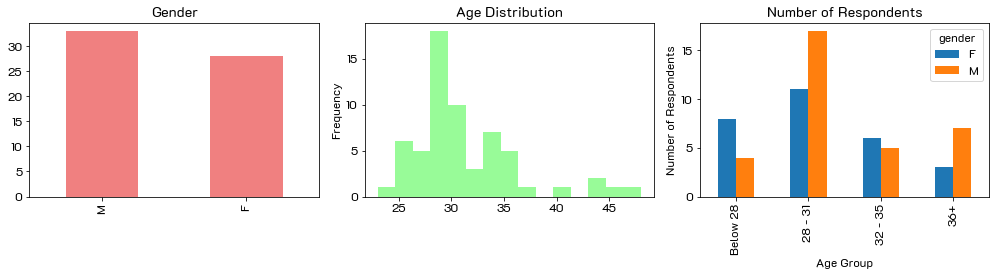

In [19]:
f, axes = plt.subplots(1,3, figsize=(14,4), tight_layout=True)


df.groupby(['age_group','gender']).size().unstack().fillna(0).plot(kind='bar', xlabel='Age Group', ylabel='Number of Respondents', 
                                                                   title='Number of Respondents', ax=axes[2])
df['age'].plot.hist(bins=15, title='Age Distribution', ax=axes[1],color = 'palegreen')
df['gender'].value_counts(dropna=False).plot(kind='bar', title='Gender', ax=axes[0],color = 'lightcoral')

;
plt.savefig('demographic.png',dpi=100)
plt.show()

In [35]:
df_male = df[df['gender'].str.contains("M")]
df_male.head(3)

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consumption [อาหารญี่ปุ่น],Consumption [อาหารจึน],Consumption [อาหารไทย],Consumption [อาหารอีสาน],Consumption [อาหารสุขภาพ],Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],Consumption [ปิ้งย่าง],Consumption [เหล้าเบียร์],Consumption [เสื้อผ้าแฟชั่น],Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],Consumption [การออกกำลังกาย],Consumption [การเล่นเกมส์],Consumption [การท่องเที่ยว],Consumption [การอ่านหนังสือ],Consumption [การอ่านบทความ Online],Consumption [การเรียน e-learning],Consumption [ดู Series],Consumption [ดูหนัง],Consumption [ดู Youtube],Consumption [ดู Netflix],Consumption [Content ด้านบันเทิง],Consumption [Content เกี่่ยวกับเกมส์],Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],interests,dob,gender,age,age_group
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19,M,33,32 - 35
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,-,1993-11-07,M,28,28 - 31
3,สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจ,สนใจ,สนใจ,สนใจ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจ,เฉยๆ,ไม่สนใจ,ไม่สนใจอย่างมากที่สุด,สนใจอย่างมาก,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบทุกวัน,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม

In [73]:
df_female = df[df['gender'].str.contains("F")]

In [74]:
df_female_intr = df_female.iloc[:,:30]
df_female_intr.head(3)

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง]
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ
4,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,เฉยๆ,สนใจ,สนใจ,ไม่สนใจ,ไม่สนใจ,เฉยๆ
6,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจ,เฉยๆ,สนใจ,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจ,ไม่สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมาก,ไม่สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก


In [36]:
df_male_intr = df_male.iloc[:,:30]
df_male_intr.head(3)

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง]
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด
3,สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจ,สนใจ,สนใจ,สนใจ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจ,เฉยๆ,ไม่สนใจ,ไม่สนใจอย่างมากที่สุด,สนใจอย่างมาก


In [37]:
#mapping_intr = {'ไม่สนใจอย่างมากที่สุด': 1, 'ไม่สนใจอย่างมาก': 2, 'ไม่สนใจ': 3, 'เฉยๆ': 4, 'สนใจ': 5, 'สนใจอย่างมาก': 6, 'สนใจอย่างมากที่สุด': 7}
#mapping_cons ={'แทบไม่ได้บริโภคเลย': 1, 'หลายเดือนครั้ง': 2, 'เดือนละครั้ง': 3, 'เดือนละ 2-3 ครั้ง': 4, 'อาทิตย์ละครั้ง': 5, 'แทบทุกวัน': 6}

In [38]:
df_male_intr = df_male_intr.replace({'ไม่สนใจอย่างมากที่สุด': 1, 'ไม่สนใจอย่างมาก': 2, 'ไม่สนใจ': 3, 'เฉยๆ': 4, 'สนใจ': 5, 'สนใจอย่างมาก': 6, 'สนใจอย่างมากที่สุด': 7})
df_male_intr.head(3)

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง]
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,1,6


In [75]:
df_female_intr = df_female_intr.replace({'ไม่สนใจอย่างมากที่สุด': 1, 'ไม่สนใจอย่างมาก': 2, 'ไม่สนใจ': 3, 'เฉยๆ': 4, 'สนใจ': 5, 'สนใจอย่างมาก': 6, 'สนใจอย่างมากที่สุด': 7})


In [76]:
data_ibs_female_intr = pd.DataFrame(index=df_female_intr.columns,columns=df_female_intr.columns)

In [40]:
data_ibs_male_intr = pd.DataFrame(index=df_male_intr.columns,columns=df_male_intr.columns)
data_ibs_male_intr

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง]
Interest [อาหารญี่ปุ่น],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest [อาหารจึน],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest [อาหารไทย],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest [อาหารอีสาน],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest [อาหารสุขภาพ],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest [บุฟเฟต์],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest [ชาบูชาบู],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest [ปิ้งย่าง],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest [เหล้าเบียร์],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest [เสื้อผ้าแฟชั่น],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

In [27]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

In [28]:
mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/font/K2D/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

In [77]:
for i in range(0,len(data_ibs_female_intr.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_ibs_female_intr.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs_female_intr.iloc[i,j] = 1-cosine(df_female_intr.iloc[:,i],df_female_intr.iloc[:,j])
      
data_ibs_female_intr

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง]
Interest [อาหารญี่ปุ่น],1,0.957656,0.966927,0.961781,0.942834,0.96839,0.985075,0.981435,0.891127,0.951799,0.958501,0.964524,0.959772,0.938905,0.975812,0.96222,0.976973,0.97848,0.975196,0.973855,0.972452,0.979044,0.964702,0.916494,0.987383,0.976433,0.941228,0.944111,0.951113,0.919107
Interest [อาหารจึน],0.957656,1,0.94493,0.946627,0.959971,0.924211,0.9484,0.949724,0.908664,0.914688,0.912467,0.926359,0.95026,0.886105,0.965393,0.956341,0.970531,0.968728,0.963965,0.956186,0.952155,0.955486,0.945828,0.855468,0.943359,0.955759,0.932124,0.945751,0.935826,0.908908
Interest [อาหารไทย],0.966927,0.94493,1,0.98799,0.955459,0.930645,0.955801,0.956544,0.900243,0.964951,0.969378,0.971944,0.962554,0.926622,0.966199,0.939272,0.956731,0.976414,0.965012,0.958222,0.970856,0.978216,0.971473,0.907394,0.964506,0.96588,0.952311,0.950752,0.960124,0.938882
Interest [อาหารอีสาน],0.961781,0.946627,0.98799,1,0.959601,0.917658,0.937893,0.939608,0.889425,0.948021,0.959348,0.962793,0.951965,0.90148,0.958494,0.933526,0.947319,0.966709,0.959769,0.953699,0.960401,0.972186,0.963205,0.879903,0.95357,0.961576,0.941901,0.938381,0.951359,0.924553
Interest [อาหารสุขภาพ],0.942834,0.959971,0.955459,0.959601,1,0.918059,0.93314,0.93794,0.906366,0.938156,0.93531,0.946398,0.972074,0.89946,0.956742,0.950638,0.951853,0.963527,0.958663,0.950663,0.946295,0.960445,0.945316,0.870553,0.935819,0.951595,0.953086,0.955852,0.945558,0.946086
Interest [บุฟเฟต์],0.96839,0.924211,0.930645,0.917658,0.918059,1,0.983108,0.983218,0.873369,0.931097,0.943392,0.94804,0.92918,0.941463,0.951371,0.947533,0.950305,0.951771,0.949563,0.949942,0.957847,0.956171,0.956009,0.904341,0.967983,0.956606,0.928906,0.93394,0.935664,0.908439
Interest [ชาบูชาบู],0.985075,0.9484,0.955801,0.937893,0.93314,0.983108,1,0.992959,0.89993,0.951151,0.953047,0.961276,0.954757,0.95615,0.975213,0.965706,0.97509,0.972962,0.964977,0.968929,0.970284,0.971741,0.964107,0.932199,0.985252,0.974555,0.951968,0.949273,0.950291,0.9235
Interest [ปิ้งย่าง],0.981435,0.949724,0.956544,0.939608,0.93794,0.983218,0.992959,1,0.910091,0.956879,0.962175,0.967546,0.956724,0.94986,0.979993,0.959069,0.973834,0.973118,0.966851,0.964951,0.971921,0.972452,0.967712,0.918109,0.983398,0.975051,0.951174,0.954254,0.951312,0.930071
Interest [เหล้าเบียร์],0.891127,0.908664,0.900243,0.889425,0.906366,0.873369,0.89993,0.910091,1,0.90343,0.889589,0.915346,0.902832,0.872608,0.929208,0.897473,0.918224,0.912444,0.929506,0.925842,0.898762,0.925875,0.92127,0.859093,0.891464,0.912944,0.922196,0.927386,0.906252,0.916792
Interest [เสื้อผ้าแฟชั่น],0.951799,0.914688,0.964951,0.948021,0.938156,0.931097,0.951151,0.956879,0.90343,1,0.982064,0.974943,0.949659,0.922843,0.956153,0.942545,0.9526,0.954697,0.952412,0.93746,0.937032,0.952064,0.957749,0.898244,0.945539,0.943006,0.942209,0.936093,0.952334,0.938109


In [42]:
for i in range(0,len(data_ibs_male_intr.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_ibs_male_intr.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs_male_intr.iloc[i,j] = 1-cosine(df_male_intr.iloc[:,i],df_male_intr.iloc[:,j])
      
data_ibs_male_intr

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง]
Interest [อาหารญี่ปุ่น],1,0.974757,0.982753,0.971298,0.960939,0.981555,0.989803,0.983068,0.887997,0.956927,0.870368,0.925958,0.966494,0.964103,0.976475,0.958843,0.960692,0.973868,0.977523,0.977858,0.982033,0.975517,0.933854,0.953576,0.969776,0.977945,0.952611,0.921358,0.886988,0.962554
Interest [อาหารจึน],0.974757,1,0.957577,0.940981,0.937999,0.956305,0.962797,0.970325,0.879834,0.927198,0.881996,0.91097,0.936603,0.941666,0.95467,0.917966,0.921423,0.957334,0.952399,0.954411,0.96537,0.958964,0.920902,0.931606,0.933369,0.949668,0.924695,0.904407,0.898456,0.941581
Interest [อาหารไทย],0.982753,0.957577,1,0.974257,0.956286,0.976836,0.981274,0.977169,0.91916,0.94861,0.883678,0.920025,0.970596,0.958288,0.975495,0.958297,0.955664,0.976356,0.971339,0.975077,0.978774,0.975003,0.93581,0.943919,0.96412,0.97648,0.948341,0.933621,0.9018,0.973125
Interest [อาหารอีสาน],0.971298,0.940981,0.974257,1,0.953088,0.965835,0.971864,0.958131,0.898867,0.968206,0.867057,0.925967,0.950059,0.930577,0.959763,0.953241,0.952742,0.966601,0.956622,0.974507,0.972638,0.963211,0.911695,0.91777,0.944881,0.962921,0.947111,0.90398,0.869079,0.969547
Interest [อาหารสุขภาพ],0.960939,0.937999,0.956286,0.953088,1,0.943571,0.957861,0.942367,0.844502,0.943494,0.87019,0.943465,0.95622,0.931213,0.951861,0.955678,0.962174,0.963595,0.943324,0.945107,0.952394,0.942035,0.884689,0.90962,0.93826,0.958401,0.912148,0.897283,0.855693,0.946616
Interest [บุฟเฟต์],0.981555,0.956305,0.976836,0.965835,0.943571,1,0.988795,0.983015,0.929862,0.950703,0.859563,0.904964,0.953054,0.951678,0.97124,0.935752,0.937758,0.952431,0.9645,0.9692,0.975832,0.96377,0.938287,0.943623,0.960975,0.970675,0.942128,0.926936,0.89104,0.966123
Interest [ชาบูชาบู],0.989803,0.962797,0.981274,0.971864,0.957861,0.988795,1,0.985736,0.910799,0.960711,0.857965,0.920985,0.955732,0.949946,0.96865,0.943216,0.949632,0.96404,0.97082,0.971089,0.980892,0.9735,0.929978,0.93778,0.962649,0.973863,0.948634,0.91127,0.875998,0.964984
Interest [ปิ้งย่าง],0.983068,0.970325,0.977169,0.958131,0.942367,0.983015,0.985736,1,0.910115,0.942696,0.854494,0.90222,0.95235,0.955327,0.966454,0.942361,0.945414,0.962279,0.965137,0.96691,0.977431,0.975295,0.933838,0.937564,0.961135,0.966579,0.940631,0.911138,0.885402,0.956926
Interest [เหล้าเบียร์],0.887997,0.879834,0.91916,0.898867,0.844502,0.929862,0.910799,0.910115,1,0.882524,0.849143,0.804441,0.892632,0.869539,0.905491,0.834097,0.835817,0.871628,0.881412,0.889322,0.879271,0.886717,0.87272,0.844117,0.863213,0.893066,0.891785,0.870949,0.869308,0.894049
Interest [เสื้อผ้าแฟชั่น],0.956927,0.927198,0.94861,0.968206,0.943494,0.950703,0.960711,0.942696,0.882524,1,0.880704,0.90644,0.929715,0.905256,0.924972,0.929963,0.937973,0.937246,0.920383,0.939083,0.954787,0.933191,0.895409,0.882368,0.925478,0.940661,0.924663,0.880966,0.860258,0.932653


In [78]:
links_f = data_ibs_female_intr.stack().reset_index()
links_f.columns = ['edge1', 'edge2','value']
links_f

,edge1,edge2,value
0,Interest [อาหารญี่ปุ่น],Interest [อาหารญี่ปุ่น],1
1,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],0.957656
2,Interest [อาหารญี่ปุ่น],Interest [อาหารไทย],0.966927
3,Interest [อาหารญี่ปุ่น],Interest [อาหารอีสาน],0.961781
4,Interest [อาหารญี่ปุ่น],Interest [อาหารสุขภาพ],0.942834
...,...,...,...
895,Interest [Content เกี่ยวกับการเมือง],Interest [Content เกี่ยวกับการท่องเที่ยว],0.952167
896,Interest [Content เกี่ยวกับการเมือง],Interest [Content เกี่ยวกับการแต่งบ้าน],0.955307
897,Interest [Content เกี่ยวกับการเมือง],Interest [Content เกี่ยวกับการโทรทัศน์],0.963112
898,Interest [Content เกี่ยวกับการเมือง],Interest [Content เกี่ยวกับละคร],0.949875


In [43]:
links = data_ibs_male_intr.stack().reset_index()
links.columns = ['edge1', 'edge2','value']
links

,edge1,edge2,value
0,Interest [อาหารญี่ปุ่น],Interest [อาหารญี่ปุ่น],1
1,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],0.974757
2,Interest [อาหารญี่ปุ่น],Interest [อาหารไทย],0.982753
3,Interest [อาหารญี่ปุ่น],Interest [อาหารอีสาน],0.971298
4,Interest [อาหารญี่ปุ่น],Interest [อาหารสุขภาพ],0.960939
...,...,...,...
895,Interest [Content เกี่ยวกับการเมือง],Interest [Content เกี่ยวกับการท่องเที่ยว],0.971057
896,Interest [Content เกี่ยวกับการเมือง],Interest [Content เกี่ยวกับการแต่งบ้าน],0.939635
897,Interest [Content เกี่ยวกับการเมือง],Interest [Content เกี่ยวกับการโทรทัศน์],0.948257
898,Interest [Content เกี่ยวกับการเมือง],Interest [Content เกี่ยวกับละคร],0.890777


In [79]:
links_f_filtered=links.loc[ (links_f['value'] > 0.987) & (links_f['edge1'] != links_f['edge2']) ]
links_f_filtered.count()

edge1    16
edge2    16
value    16
dtype: int64

In [66]:
links_filtered=links.loc[ (links['value'] > 0.987) & (links['edge1'] != links['edge2']) ]
links_filtered.count()

edge1    10
edge2    10
value    10
dtype: int64

TypeError: ignored

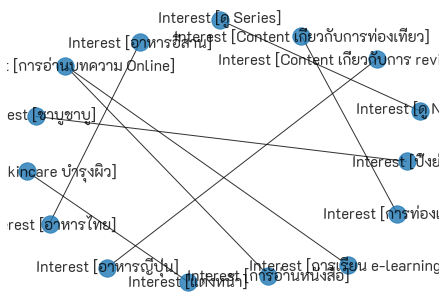

In [80]:
G_f=nx.from_pandas_edgelist(links_f_filtered, 'edge1', 'edge2','value')
labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':15}
pos = nx.spring_layout(G_f)
pos = nx.spring_layout(G_f, k=7, weight='value', iterations=80, seed=90, scale=2.5)
nx.draw(G_f, pos,**labels_params)
nx.draw_networkx_labels(G_f, pos,**labels_params)
edge_labels = nx.get_edge_attributes(G_f,'value')
nx.draw_networkx_edge_labels( G_f, pos, labels = edge_labels,font_color='pink',**labels_params)
plt.figure(figsize=(60,60))
plt.savefig('this.png')
plt.title('Association Rules of 1-itemsets')
plt.show()

TypeError: ignored

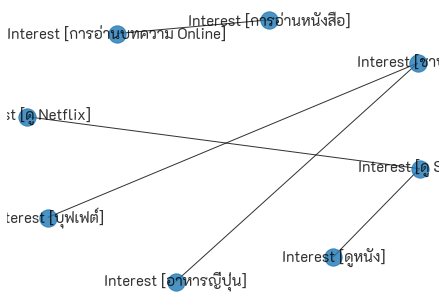

In [71]:
import networkx as nx
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'edge1', 'edge2','value')
labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':15}
pos = nx.spring_layout(G)
pos = nx.spring_layout(G, k=7, weight='value', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos,**labels_params)
nx.draw_networkx_labels(G, pos,**labels_params)
edge_labels = nx.get_edge_attributes(G,'value')
nx.draw_networkx_edge_labels( G, pos, labels = edge_labels,font_color='tomato',**labels_params)
plt.figure(figsize=(60,60))
plt.savefig('this.png')
plt.title('Association Rules of 1-itemsets')
plt.show()
#G, pos, labels = edge_labels

In [ ]:
def process_interest(df):
    result = df.iloc[:,:30].melt(var_name='question', value_name='answer').groupby(['question','answer'], as_index=False).size().pivot('question','answer','size').fillna(0)
    result = result[intr_scale].reindex(df.columns[:30])
    result = result.apply(lambda x: x/x.sum(), axis=1)
    return result

int_overall_df = process_interest(df)
int_male_df = process_interest(df[df['gender']=='M'])
int_female_df = process_interest(df[df['gender']=='F'])

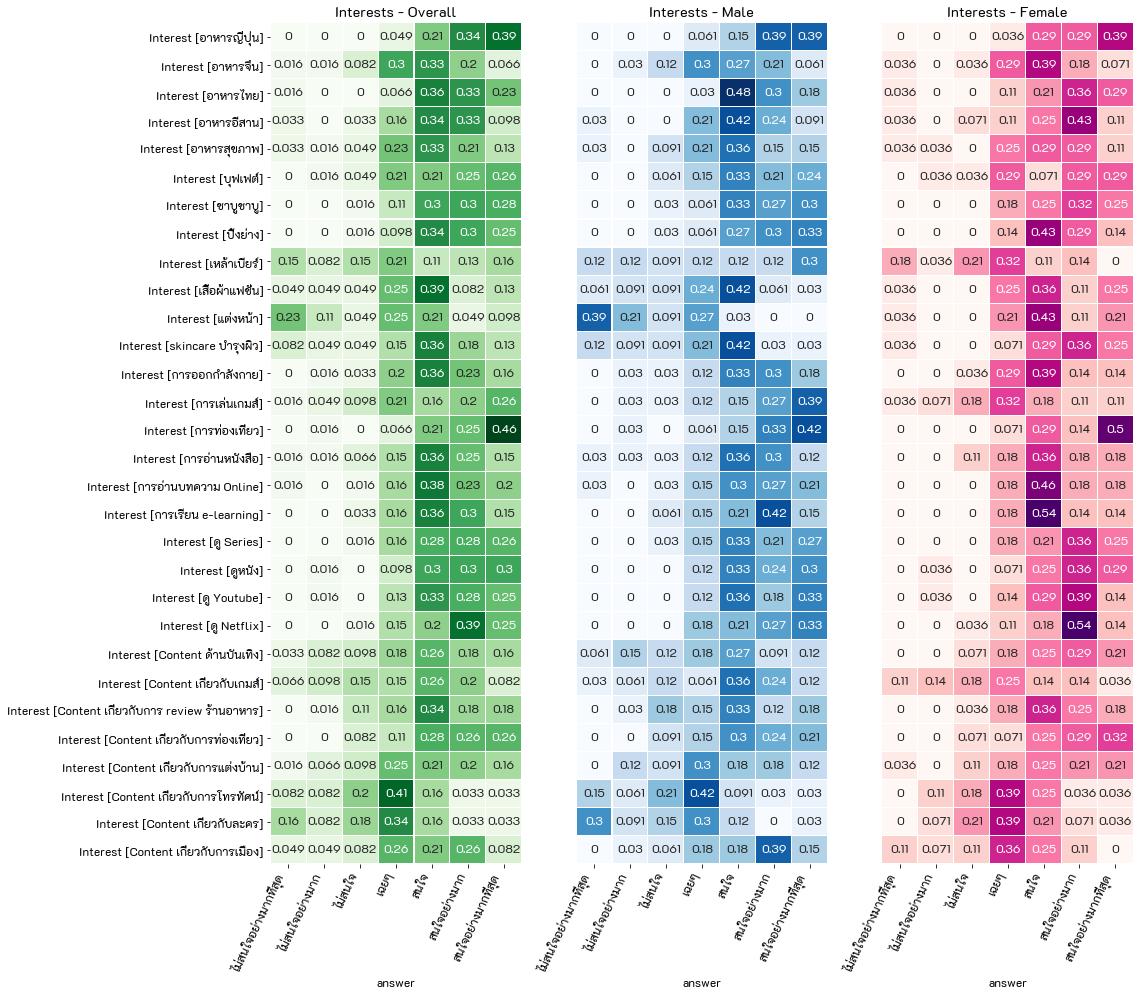

In [ ]:
def plot_freq_heatmap(df, cmap, title):
    ax = sns.heatmap(df, cmap=cmap, annot=True, linewidth=.1, vmin=0, cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right')
    ax.set_title(title)
    return ax

plt.subplots(1,3, figsize=(16,14), tight_layout=True)

plt.subplot(1,3,1)
plot_freq_heatmap(int_overall_df, 'Greens', 'Interests - Overall')

plt.subplot(1,3,2)
ax = plot_freq_heatmap(int_male_df, 'Blues', 'Interests - Male')
ax.set_yticks([])

plt.subplot(1,3,3)
ax = plot_freq_heatmap(int_female_df, 'RdPu', 'Interests - Female')
ax.set_yticks([])

plt.savefig('interest_freq.png', dpi=100)
plt.show()

โดยส่วนมากคนจะชอบเรื่องการท่องเที่ยวและดู Netflix \
ถ้าแยกดูผู้ชายโดยเฉพาะจะเห็ฯว่าชอบเล่นเกมส์ และมีความสนใจเรื่องการเมือง แต่ไม่ชอบเรื่องแต่งหน้า \
และผู้หญิงชอบอาหารอีสาน บำรุงผิว และชอบดู Netflix กันมาก แต่ไม่ได้มีเรื่องที่ไม่ชอบเรื่องใดเป็นพิเศษ

##Descriptive Data

###แปลงค่า Scale ให้เป็นตัวเลข

In [ ]:
intr_questions = list(df.columns[:30])
cons_questions = list(df.columns[30:60])

intr_mapper = { v:i for i,v in enumerate(intr_scale,1) }
cons_mapper = { v:i for i,v in enumerate(cons_scale,1) }
print(intr_mapper, cons_mapper, sep='\n')

{'ไม่สนใจอย่างมากที่สุด': 1, 'ไม่สนใจอย่างมาก': 2, 'ไม่สนใจ': 3, 'เฉยๆ': 4, 'สนใจ': 5, 'สนใจอย่างมาก': 6, 'สนใจอย่างมากที่สุด': 7}
{'แทบไม่ได้บริโภคเลย': 1, 'หลายเดือนครั้ง': 2, 'เดือนละครั้ง': 3, 'เดือนละ 2-3 ครั้ง': 4, 'อาทิตย์ละครั้ง': 5, 'แทบทุกวัน': 6}


In [ ]:
score_df = df[list(df.columns[:60]) + ['gender','age_group']].copy()

for col in score_df.columns[:30]:
    score_df[col] = score_df[col].map(intr_mapper).astype(int)

for col in score_df.columns[30:60]:
    score_df[col] = score_df[col].map(cons_mapper).astype(int)

score_df = score_df.melt(id_vars=['gender','age_group'], var_name='question', value_name='score')
print(score_df.shape)
score_df.head()

(3660, 4)


,gender,age_group,question,score
0,M,32 - 35,Interest [อาหารญี่ปุ่น],5
1,F,28 - 31,Interest [อาหารญี่ปุ่น],6
2,M,28 - 31,Interest [อาหารญี่ปุ่น],7
3,M,Below 28,Interest [อาหารญี่ปุ่น],5
4,F,Below 28,Interest [อาหารญี่ปุ่น],6


In [ ]:
intr_score_df = score_df[score_df['question'].isin(intr_questions)]
cons_score_df = score_df[score_df['question'].isin(cons_questions)]

In [ ]:
with pd.option_context('display.max_rows', None):
    display(score_df.groupby(['question','gender'])['score'].agg([len, np.mean, np.std, np.median, min, max]).reindex( 
        pd.MultiIndex.from_product([df.columns[:60],['F','M']], names=['Question', 'Gender']),
        fill_value=0
    ))

len  ...  max
Question                                           Gender       ...     
Interest [อาหารญี่ปุ่น]                            F        28  ...    7
                                                   M        33  ...    7
Interest [อาหารจึน]                                F        28  ...    7
                                                   M        33  ...    7
Interest [อาหารไทย]                                F        28  ...    7
                                                   M        33  ...    7
Interest [อาหารอีสาน]                              F        28  ...    7
                                                   M        33  ...    7
Interest [อาหารสุขภาพ]                             F        28  ...    7
                                                   M        33  ...    7
Interest [บุฟเฟต์]                                 F        28  ...    7
                                                   M        33  ...    7
Interest [ชาบูชาบู]                                F        28  ...    7
                                                   M        33  ...    7
Interest [ปิ้งย่าง]                                F        28  ...    7
                                                   M        33  ...    7
Interest [เหล้าเบียร์]                             F        28  ...    6
                                                   M        33  ...    7
Interest [เสื้อผ้าแฟชั่น]                          F        28  ...    7
                                                   M        33  ...    7
Interest [แต่งหน้า]                                F        28  ...    7
                                                   M        33  ...    5
Interest [skincare บำรุงผิว]                       F        28  ...    7
                                                   M        33  ...    7
Interest [การออกกำลังกาย]                          F        28  ...    7
                                                   M        33  ...    7
Interest [การเล่นเกมส์]                            F        28  ...    7
                                                   M        33  ...    7
Interest [การท่องเที่ยว]                           F        28  ...    7
                                                   M        33  ...    7
Interest [การอ่านหนังสือ]                          F        28  ...    7
                                                   M        33  ...    7
Interest [การอ่านบทความ Online]                    F        28  ...    7
                                                   M        33  ...    7
Interest [การเรียน e-learning]                     F        28  ...    7
                                                   M        33  ...    7
Interest [ดู Series]                               F        28  ...    7
                                                   M        33  ...    7
Interest [ดูหนัง]                                  F        28  ...    7
                                                   M        33  ...    7
Interest [ดู Youtube]                              F        28  ...    7
                                                   M        33  ...    7
Interest [ดู Netflix]                              F        28  ...    7
                                                   M        33  ...    7
Interest [Content ด้านบันเทิง]                     F        28  ...    7
                                                   M        33  ...    7
Interest [Content เกี่่ยวกับเกมส์]                 F        28  ...    7
                                                   M        33  ...    7
Interest [Content เกี่ยวกับการ review ร้านอาหาร]   F        28  ...    7
                                                   M        33  ...    7
Interest [Content เกี่ยวกับการท่องเที่ยว]          F        28  ...    7
                                                   M        33  ...    7
Interest [Content เกี่ยวกับการแต่งบ้าน]            F        28  ...    7
                                            

###Side-by-side distribution

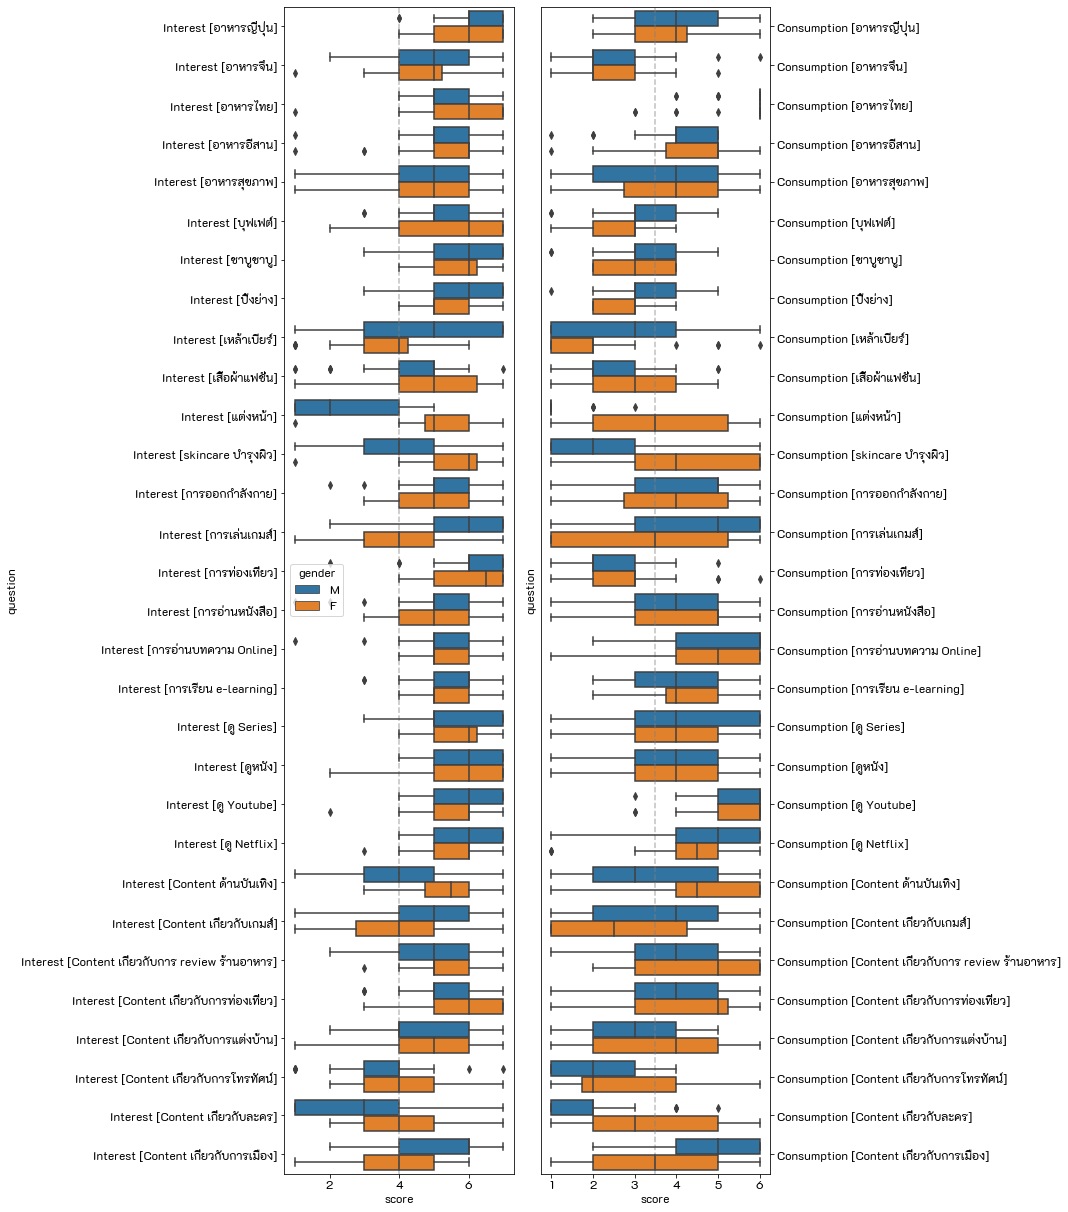

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,17), tight_layout=True)

ax = axes[0]
ax.axvline(x=4, color='gray',alpha=.5, linestyle='--')
ax = sns.boxplot(x='score',y='question', hue='gender',data=intr_score_df, ax=ax)#, palette=palette)

ax = axes[1]
ax.axvline(x=3.5, color='gray',alpha=.5, linestyle='--')
ax = sns.boxplot(x='score',y='question', hue='gender',data=cons_score_df, ax=ax)#, palette=palette)
ax.yaxis.tick_right()
ax.legend().set_visible(False)
plt.savefig('boxplot.png',dpi=100)
plt.show()

* ผู้ชายจะชอบบริโภคแอลกอฮอล์มากกว่าผู้หญิง แต่อาจเพราะส่วนมากเป็ฯวัยทำงานแล้วจึงไม่ค่อยมีเวลาไปดื่ม \
* ทั้งผู้หญิงและผู้ชายชอบทานอาหารทุกประเภทแต่ไม่ค่อยได้บริโภคจริงๆ \
* เรื่องการบำรุงผิวยังมีผู้ชายที่ชื่นชอบอยู่บ้าง แต่เรื่องการซื้อมาใช้นั้นไม่ค่อยบ่อยถ้าเทียบกับผู้หญิง \
* เรื่องเกมส์ ผู้ชายจะทั้งชอบและเล่นจริงส่วนผู้หญิงมีแต่ความชอบ แต่ไม่ค่อยได้เล่นจริงๆซักท่าไหร่